In [1]:
import numpy as np
from scipy.stats import f

A = np.array([91.5, 94.18, 92.18, 95.39, 91.79, 89.07, 94.72, 89.21])
B = np.array([89.19, 90.95, 90.46, 93.21, 97.19, 97.04, 91.07, 92.75])

# Calculate the variances
var_A = np.var(A, ddof=1)
print(var_A)
var_B = np.var(B, ddof=1)
print(var_B)

# Calculate the F statistic
F = var_A / var_B

# Calculate the degrees of freedom for each sample
df1 = len(A) - 1
df2 = len(B) - 1

# Calculate the p-value
p_value = f.cdf(F, df1, df2)

# Print the results
print(f'F-statistic: {F}')
print(f'p-value: {p_value}')

# Compare the p-value to our significance level
alpha = 0.05
if p_value > alpha:
    print('The variances are equal.')
else:
    print('The variances are not equal.')


5.6883142857143
8.900992857142871
F-statistic: 0.6390651444180793
p-value: 0.2845655174712992
The variances are equal.


In [3]:
from scipy import stats
# Calculate the means
mean_A = np.mean(A)
mean_B = np.mean(B)

# Calculate the difference between the means
diff = mean_A - mean_B

# Perform a t-test
t_statistic, p_value = stats.ttest_ind(A, B, equal_var=True)

# Print the results
print(f'Difference between means: {diff}')
print(f't-statistic: {t_statistic}')
print(f'p-value: {p_value}')

# Compare the p-value to our significance level
alpha = 0.05
if p_value > alpha:
    print('The difference between the means is not statistically significant.')
else:
    print('The difference between the means is statistically significant.')

Difference between means: -0.47749999999999204
t-statistic: -0.35359086434617987
p-value: 0.7289136186068217
The difference between the means is not statistically significant.


In [13]:
import numpy as np
from scipy.optimize import curve_fit

# Check with library:
def second_order_model(x, B1, B2, B3):
    return B1 + B2*x + B3*x**2

# Given data
x_data = np.array([0, 0, 0, 1, 2, 2, 3, 3, 4, 4, 5, 6, 6, 6, 7, 8, 8, 9, 10])
y_data = np.array([22.1, 21.9, 22.3, 24.5, 26.0, 26.1, 26.8, 27.3, 28.2, 28.5, 28.9, 30.0, 30.3, 29.8, 30.4, 31.4, 31.5, 31.8, 33.1])

# Fitting the model to the data
popt, pcov = curve_fit(second_order_model, x_data, y_data)

# Extracting the coefficients
B1, B2, B3 = popt

print("Coefficients:")
print("B1 =", B1)
print("B2 =", B2)
print("B3 =", B3)


Coefficients:
B1 = 22.434552660783144
B2 = 1.7165941221800218
B3 = -0.07190983057818466


X:  [[  1   0   0]
 [  1   0   0]
 [  1   0   0]
 [  1   1   1]
 [  1   2   4]
 [  1   2   4]
 [  1   3   9]
 [  1   3   9]
 [  1   4  16]
 [  1   4  16]
 [  1   5  25]
 [  1   6  36]
 [  1   6  36]
 [  1   6  36]
 [  1   7  49]
 [  1   8  64]
 [  1   8  64]
 [  1   9  81]
 [  1  10 100]]
Y:  [[22.1]
 [21.9]
 [22.3]
 [24.5]
 [26. ]
 [26.1]
 [26.8]
 [27.3]
 [28.2]
 [28.5]
 [28.9]
 [30. ]
 [30.3]
 [29.8]
 [30.4]
 [31.4]
 [31.5]
 [31.8]
 [33.1]]
Xt:  [[  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
    1]
 [  0   0   0   1   2   2   3   3   4   4   5   6   6   6   7   8   8   9
   10]
 [  0   0   0   1   4   4   9   9  16  16  25  36  36  36  49  64  64  81
  100]]
XtX:  [[   19    84   550]
 [   84   550  4068]
 [  550  4068 32374]]
XtXinv:  [[ 0.25335591 -0.09714735  0.00790294]
 [-0.09714735  0.06300381 -0.0062664 ]
 [ 0.00790294 -0.0062664   0.00068404]]
XtY:  [[  530.9]
 [ 2536.1]
 [16994.1]]
B:  [[22.43455267]
 [ 1.71659411]
 [-0.07190983]]
Coefficients:
B1:

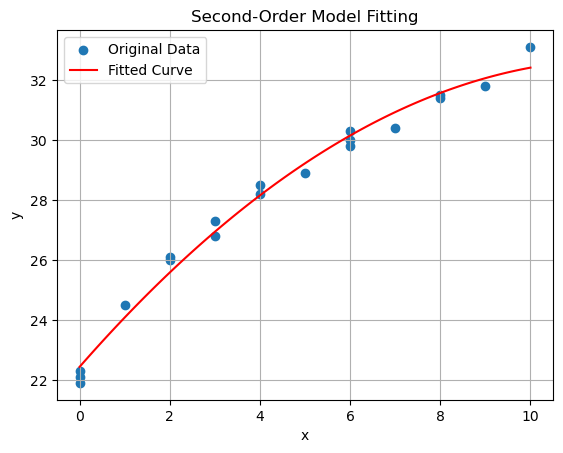

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Given data
x_data = np.array([0, 0, 0, 1, 2, 2, 3, 3, 4, 4, 5, 6, 6, 6, 7, 8, 8, 9, 10])
y_data = np.array([22.1, 21.9, 22.3, 24.5, 26.0, 26.1, 26.8, 27.3, 28.2, 28.5, 28.9, 30, 30.3, 29.8, 30.4, 31.4, 31.5, 31.8, 33.1])

# Formulate matrices X and Y
X = np.column_stack([np.ones_like(x_data), x_data, x_data**2])
Y = y_data.reshape(-1, 1)
print("X: ", X)
print("Y: ", Y)

# Calculate coefficients
X_transpose = np.transpose(X)
XtX = np.dot(X_transpose, X)
XtX_inv = np.linalg.inv(np.dot(X_transpose, X))
B = np.dot(np.dot(XtX_inv, X_transpose), Y)
XtY =  np.dot(X_transpose, Y)

print("Xt: ", X_transpose)
print("XtX: ", XtX)
print("XtXinv: ", XtX_inv)
print("XtY: ", XtY)
print("B: ", B)

# Extract coefficients
B1, B2, B3 = B.flatten()

# Print coefficients
print("Coefficients:")
print("B1:", B1)
print("B2:", B2)
print("B3:", B3)

# Generate fitted curve
x_fit = np.linspace(0, 10, 100)
y_fit = B1 + B2 * x_fit + B3 * x_fit**2

# Plot original data and fitted curve
plt.scatter(x_data, y_data, label='Original Data')
plt.plot(x_fit, y_fit, color='red', label='Fitted Curve')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Second-Order Model Fitting')
plt.legend()
plt.grid(True)
plt.show()


In [18]:
# Total Sum of Squares (SST)
mean_y = np.mean(y_data)
SST = np.sum((y_data - mean_y)**2)

# Regression Sum of Squares (SSR)
y_pred = B1 + B2 * x_data + B3 * x_data**2
SSR = np.sum((y_pred - mean_y)**2)

# Residual Sum of Squares (SSE)
SSE = np.sum((y_data - y_pred)**2)

# Degrees of Freedom (DF)
n = len(y_data)
p = 3  # number of parameters in the model (including intercept)
DF_regression = p - 1
DF_residual = n - p
DF_total = n - 1

# Mean Squares (MS)
MSR = SSR / DF_regression
MSE = SSE / DF_residual

# F-statistic
F_statistic = MSR / MSE

# p-value
from scipy.stats import f

p_value = 1 - f.cdf(F_statistic, DF_regression, DF_residual)

# ANOVA Table
print("ANOVA Table:")
print("Source\t\t\tDF\tSS\t\tMS\t\tF\t\t\t\tP-value")
print("Regression\t\t{}\t{:.4f}\t{:.4f}\t{:.4f}\t{:.10f}".format(DF_regression, SSR, MSR, F_statistic, p_value))
print("Residual\t\t{}\t{:.4f}\t{:.4f}".format(DF_residual, SSE, MSE))
print("Total\t\t\t{}\t{:.4f}".format(DF_total, SST))


ANOVA Table:
Source			DF	SS		MS		F				P-value
Regression		2	207.4518	103.7259	681.7091	0.0000000000
Residual		16	2.4345	0.1522
Total			18	209.8863


In [19]:
print(SST)
print(SSE)
print(SSR)

209.88631578947366
2.434491001068201
207.45182478840064


In [20]:
# Critical F-value
alpha = 0.05
critical_F = f.ppf(1 - alpha, DF_regression, DF_residual)
print(critical_F)

# Check if F-statistic is greater than critical F-value
if F_statistic > critical_F:
    print("The overall regression is significant (Reject H0)")
else:
    print("The overall regression is not significant (Fail to reject H0)")


3.63372346759163
The overall regression is significant (Reject H0)


In [22]:
# Reduced model without the second-order term
X_reduced = X[:, :2]  # Exclude the second-order term
B_reduced = np.dot(np.dot(np.linalg.inv(np.dot(X_reduced.T, X_reduced)), X_reduced.T), Y)
y_pred_reduced = np.dot(X_reduced, B_reduced)
SSE_reduced = np.sum((Y - y_pred_reduced)**2)

# Full model with the second-order term
y_pred_full = np.dot(X, B)

# Reduction in SSR
SSR_reduced = SST - SSE_reduced
reduction_in_SSR = SSR_reduced - SSR

# Degrees of freedom for the reduced model
DF_reduced_residual = n - (p - 1)

# F-statistic for the significance of the second-order term
F_statistic_second_order = (reduction_in_SSR / (p - 1)) / (SSE / DF_residual)

# Critical F-value for the test
critical_F_second_order = f.ppf(1 - alpha, p - 1, DF_residual)

# Check significance
if F_statistic_second_order > critical_F_second_order:
    print("The second-order term is significant (Reject H0)")
else:
    print("The second-order term is not significant (Fail to reject H0)")


The second-order term is not significant (Fail to reject H0)


Parameters (B): [ 6.30666667  0.85       -0.50833333]


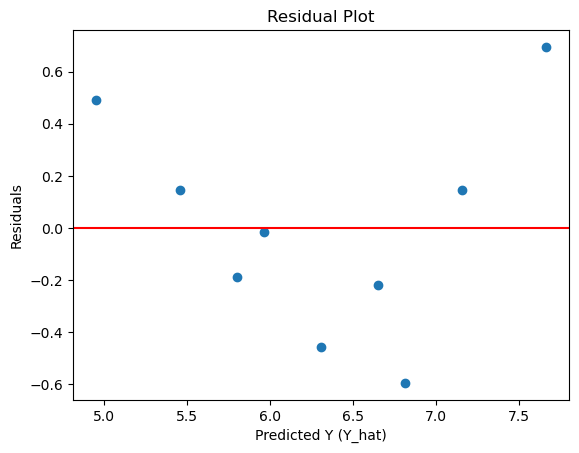

In [23]:
import numpy as np

# Given data
data = np.array([
    [5.95, 3, 30, -1, -1],
    [5.60, 3, 60, -1, 0],
    [5.44, 3, 90, -1, 1],
    [6.22, 9, 30, 0, -1],
    [5.85, 9, 60, 0, 0],
    [5.61, 9, 90, 0, 1],
    [8.36, 15, 30, 1, -1],
    [7.30, 15, 60, 1, 0],
    [6.43, 15, 90, 1, 1]
])

X = data[:, 3:5]
Y = data[:, 0]

# Adding a column of ones to X for the intercept term
X = np.hstack((np.ones((X.shape[0], 1)), X))

# Calculating parameters B
XtX_inv = np.linalg.inv(np.dot(X.T, X))
XtY = np.dot(X.T, Y)
B = np.dot(XtX_inv, XtY)

print("Parameters (B):", B)

# Compute predicted values
Y_pred = np.dot(X, B)

# Compute residuals
residuals = Y - Y_pred

import matplotlib.pyplot as plt

# Plot residuals vs Y_hat
plt.scatter(Y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='-')  # Add horizontal line at y=0
plt.xlabel('Predicted Y (Y_hat)')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


In [25]:
# Define X with additional quadratic and interaction terms
X_B = np.column_stack((X, X[:, 1] ** 2, X[:, 2] ** 2, X[:, 1] * X[:, 2]))

# Calculating parameters B for Model B
XtX_inv_B = np.linalg.inv(np.dot(X_B.T, X_B))
XtY_B = np.dot(X_B.T, Y)
B_B = np.dot(XtX_inv_B, XtY_B)

print("Parameters for Model B (B):", B_B)


Parameters for Model B (B): [ 5.83666667  0.85       -0.50833333  0.62        0.085      -0.355     ]


In [26]:
# Calculate residuals
Y_pred_B = np.dot(X_B, B_B)
residuals_B = Y - Y_pred_B

# Calculate residuals degrees of freedom
n = len(Y)
p_B = len(B_B)
df_resid_B = n - p_B

# Calculate residual standard error
residual_std_error_B = np.sqrt(np.sum(residuals_B ** 2) / df_resid_B)

# Calculate standard errors of parameter estimates
param_std_errors_B = np.sqrt(np.diag(XtX_inv_B)) * residual_std_error_B

# Calculate t-statistics
t_stats_B = B_B / param_std_errors_B

# Calculate two-tailed p-values
p_values_B = 2 * (1 - stats.t.cdf(np.abs(t_stats_B), df_resid_B))

# Display t-statistics and p-values for each parameter
print("t-statistics for Model B:", t_stats_B)
print("p-values for Model B:", p_values_B)


t-statistics for Model B: [38.44973967 10.22319891 -6.11387386  4.30525567  0.59023666 -3.48618643]
p-values for Model B: [3.87020525e-05 1.99503120e-03 8.79426299e-03 2.30651308e-02
 5.96542643e-01 3.98765107e-02]


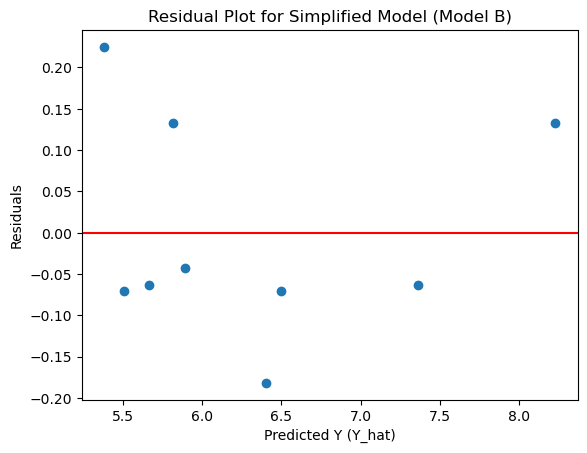

In [28]:
# Redefine X without the X2 squared term
X_B_simplified = X_B[:, [0, 1, 2, 3, 5]]  # Dropping the 4th column (X2 squared)

# Re-calculate parameters for the simplified model
XtX_inv_B_simplified = np.linalg.inv(np.dot(X_B_simplified.T, X_B_simplified))
XtY_B_simplified = np.dot(X_B_simplified.T, Y)
B_B_simplified = np.dot(XtX_inv_B_simplified, XtY_B_simplified)

# Calculate predicted values and residuals
Y_pred_B_simplified = np.dot(X_B_simplified, B_B_simplified)
residuals_B_simplified = Y - Y_pred_B_simplified

# Plot residuals vs Y_hat for the simplified model
plt.scatter(Y_pred_B_simplified, residuals_B_simplified)
plt.axhline(y=0, color='r', linestyle='-')  # Add horizontal line at y=0
plt.xlabel('Predicted Y (Y_hat)')
plt.ylabel('Residuals')
plt.title('Residual Plot for Simplified Model (Model B)')
plt.show()

In [30]:
# Calculate total sum of squares (SST)
SST = np.sum((Y - np.mean(Y)) ** 2)

# Calculate regression sum of squares (SSR)
SSR = np.sum((Y_pred_B_simplified - np.mean(Y)) ** 2)

# Calculate residual sum of squares (SSE)
SSE = np.sum(residuals_B_simplified ** 2)

# Calculate degrees of freedom
DF_reg = X_B_simplified.shape[1] - 1  # Number of parameters (excluding intercept)
DF_resid = len(Y) - (X_B_simplified.shape[1])  # Total number of observations - number of parameters
DF_total = len(Y) - 1  # Total number of observations - 1

# Calculate mean squares
MS_reg = SSR / DF_reg
MS_resid = SSE / DF_resid

# Calculate F-statistic
F_statistic = MS_reg / MS_resid

# Calculate p-value
p_value = 1 - stats.f.cdf(F_statistic, DF_reg, DF_resid)

# Display ANOVA table
print("ANOVA Table:")
print("=======================================")
print("Source    |  DF  |     SS      |    MS     | F-value  |   p-value")
print("--------------------------------------------------------------")
print("Regression| ", DF_reg, "|", SSR, "|", MS_reg, "|", F_statistic, "|", p_value)
print("Residual  | ", DF_resid, "|", SSE, "|", MS_resid)
print("Total     | ", DF_total, "|", SST)
print("=======================================")

# Calculate estimate of variance of the error affecting the Y data
variance_error_Y = MS_resid
print("Estimate of the variance of the error affecting the Y data:", variance_error_Y)


ANOVA Table:
Source    |  DF  |     SS      |    MS     | F-value  |   p-value
--------------------------------------------------------------
Regression|  4 | 7.158316666666663 | 1.7895791666666658 | 51.541941677667 | 0.0010729100484867526
Residual  |  4 | 0.13888333333333355 | 0.03472083333333339
Total     |  8 | 7.2971999999999975
Estimate of the variance of the error affecting the Y data: 0.03472083333333339


In [31]:
# Calculate parameter variance-covariance matrix
parameter_covariance_matrix = XtX_inv_B_simplified * residual_std_error_B**2

# Calculate parameter correlation matrix
parameter_correlation_matrix = parameter_covariance_matrix / np.sqrt(np.outer(np.diag(parameter_covariance_matrix), np.diag(parameter_covariance_matrix)))

print("Parameter Variance-Covariance Matrix:")
print(parameter_covariance_matrix)

print("\nParameter Correlation Matrix:")
print(parameter_correlation_matrix)


Parameter Variance-Covariance Matrix:
[[ 0.01382593  0.          0.         -0.01382593  0.        ]
 [ 0.          0.00691296  0.          0.          0.        ]
 [ 0.          0.          0.00691296  0.          0.        ]
 [-0.01382593  0.          0.          0.02073889  0.        ]
 [ 0.          0.          0.          0.          0.01036944]]

Parameter Correlation Matrix:
[[ 1.          0.          0.         -0.81649658  0.        ]
 [ 0.          1.          0.          0.          0.        ]
 [ 0.          0.          1.          0.          0.        ]
 [-0.81649658  0.          0.          1.          0.        ]
 [ 0.          0.          0.          0.          1.        ]]
